In [1]:
"""
Research Project WiSe 2024/25
- Author:   Julian Hernandez
- Email:    julian.hernandez.potes@fau.de
- Tutor:    Tomas Arias
- Email:    tomas.arias@fau.de
"""
import sys
sys.path.append('../../')
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
import src.utils as ut
from src.VideoProcessor import VideoProcessor

In [3]:
dataset_path = r"../../data/dataset_2drt_video_only"
vp = VideoProcessor(dataset_path, nSubs=['sub001'], norm=True) # only (JBL issue)

gt = vp.extract_frames(target="vcv") # all vcv named videos
n = list(gt.keys())

In [5]:
ns = ut.load_ds(r"../Metrics/noise.npz")
af = ut.load_ds(r"../Metrics/denoised_af.npz")
bf = ut.load_ds(r"../Metrics/denoised_bf.npz")
gsa = ut.load_ds(r"../Metrics/denoised_gsa.npz")
jbl = ut.load_ds(r"../Metrics/denoised_jbl.npz")

df = pd.read_csv(r"../Metrics/denoising_metrics_comparison.csv")

In [23]:
time_taken = df.groupby('Method')['Time Taken (s)'].mean()

time_taken

Method
Anisotropic    51.06
Bilateral       5.31
GSA            79.06
JBL            19.00
Name: Time Taken (s), dtype: float64

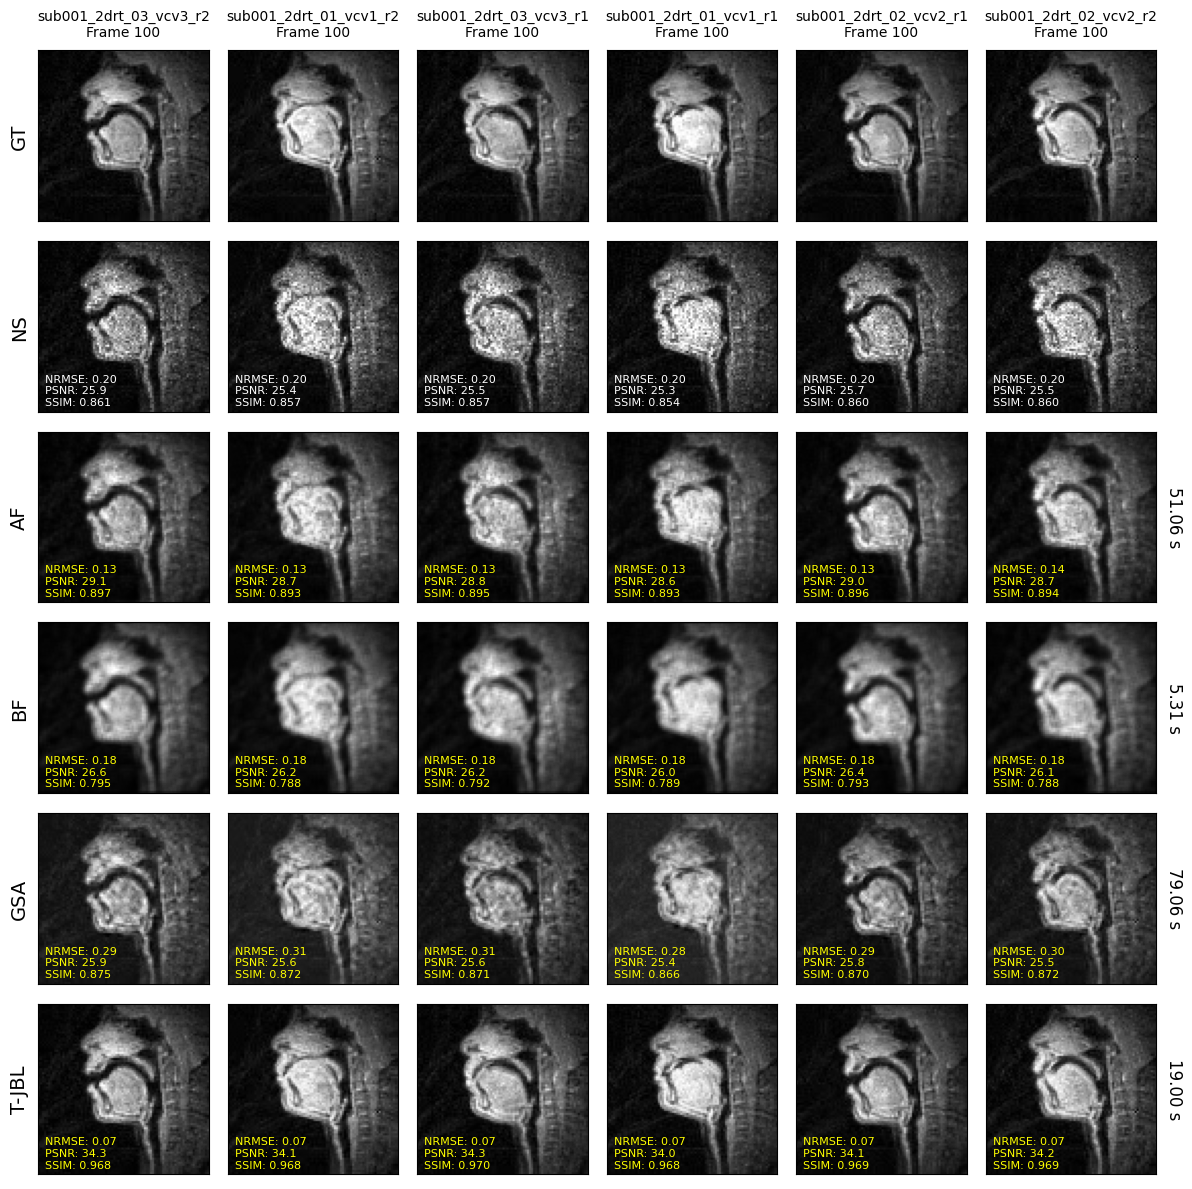

In [211]:
dataset_labels = ["GT", "NS", "AF", "BF", "GSA", "T-JBL"]
frame = 100
fig, ax = plt.subplots(6, len(n), figsize=(12, 12)) 

for j, (ds, label) in enumerate(zip([gt, ns, af, bf, gsa, jbl], dataset_labels)):
    for i, name in enumerate(n):
        ax[j, i].imshow(ds[name][frame, ...], cmap="gray")
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
        
        if i == 0:
            ax[j, i].set_ylabel(label, fontsize=14, labelpad=10, rotation=90, va="center")

        if j == 0:
            nam = name.split("_video")[0]
            ax[j, i].set_title(f"{nam}\nFrame {frame}", fontsize=10, pad=10)
        
        if j == 1:
            nrmse = df[df['Video Name'] == name].loc[df['Metric'] == 'NRMSE', 'Noise'].values[0]
            psnr  = df[df['Video Name'] == name].loc[df['Metric'] == 'PSNR', 'Noise'].values[0]
            ssim  = df[df['Video Name'] == name].loc[df['Metric'] == 'SSIM', 'Noise'].values[0]
            
            text = f"NRMSE: {nrmse:.2f}\nPSNR: {psnr:.1f}\nSSIM: {ssim:.3f}"
            
            ax[j, i].text(3, 65, text, fontsize=8, color="white", va="top", ha="left") #bbox=dict(facecolor="black", alpha=0.2))
        
        if j > 1:
            if i == 5:
                ax[j, i].annotate(
                    f"{time_taken[j-2]:.2f} s", xy=(1.05, 0.5), xycoords="axes fraction",
                    fontsize=12, va="center", rotation=-90, bbox=dict(facecolor="white", 
                    edgecolor="none", pad=3))
            
            metrics = df[(df['Video Name'] == name) & (df["Method"] == df["Method"].unique()[j-2])] # ordered :)
            
            nrmse = metrics.loc[metrics['Metric'] == 'NRMSE', 'Denoised'].values[0] # metrics annotation
            psnr  = metrics.loc[metrics['Metric'] == 'PSNR', 'Denoised'].values[0]
            ssim  = metrics.loc[metrics['Metric'] == 'SSIM', 'Denoised'].values[0]
            
            text = f"NRMSE: {nrmse:.2f}\nPSNR: {psnr:.1f}\nSSIM: {ssim:.3f}"
        
            ax[j, i].text(3, 65, text, fontsize=8, color="yellow", va="top", ha="left") #bbox=dict(facecolor="black", alpha=0.2))
            
            
fig.tight_layout()
plt.show()

In [212]:
fig.savefig('../../images/comp_1.png')

In [129]:
df.head()

,Video Name,Method,Metric,Noise,Denoised,Time Taken (s)
0,sub001_2drt_01_vcv1_r2_video,Anisotropic,NRMSE,0.1955,0.1342,51.06
1,sub001_2drt_01_vcv1_r2_video,Anisotropic,PSNR,25.4466,28.7075,51.06
2,sub001_2drt_01_vcv1_r2_video,Anisotropic,SSIM,0.8571,0.8930,51.06
3,sub001_2drt_01_vcv1_r2_video,Bilateral,NRMSE,0.1955,0.1799,5.31
4,sub001_2drt_01_vcv1_r2_video,Bilateral,PSNR,25.4466,26.1695,5.31


In [170]:
# metrics = df[(df['Video Name'] == n[0]) & (df["Method"] == "Anisotropic")]
metrics = df[(df['Video Name'] == n[5]) & (df["Method"] == df["Method"].unique()[0])]

metrics.head(20)    

,Video Name,Method,Metric,Noise,Denoised,Time Taken (s)
48,sub001_2drt_02_vcv2_r2_video,Anisotropic,NRMSE,0.1953,0.1354,51.06
49,sub001_2drt_02_vcv2_r2_video,Anisotropic,PSNR,25.5172,28.6910,51.06
50,sub001_2drt_02_vcv2_r2_video,Anisotropic,SSIM,0.8603,0.8942,51.06


In [ ]:
nrmse = metrics.loc[metrics['Metric'] == 'SSIM', 'Noise'].values[0]

print(nrmse)

0.8603


In [201]:
metrics = df[(df['Video Name'] == n[5]) & (df["Metric"] == "SSIM")]

metrics.head(20)    

,Video Name,Method,Metric,Noise,Denoised,Time Taken (s)
50,sub001_2drt_02_vcv2_r2_video,Anisotropic,SSIM,0.8603,0.8942,51.06
53,sub001_2drt_02_vcv2_r2_video,Bilateral,SSIM,0.8603,0.7878,5.31
56,sub001_2drt_02_vcv2_r2_video,GSA,SSIM,0.8603,0.8715,79.06
59,sub001_2drt_02_vcv2_r2_video,JBL,SSIM,0.8603,0.9691,19.00


In [200]:
# metrics = df[(df['Video Name'] == n[0])
df[df['Video Name'] == n[5]].loc[df['Metric'] == 'SSIM', 'Noise'].values[0]

0.8603

In [6]:
VideoProcessor.video(ns, "../../data/outputs/noisy")
VideoProcessor.video(jbl, "../../data/outputs/jbl")

Video saved at ../../data/outputs/noisy/sub001_2drt_01_vcv1_r2_video.mp4
Video saved at ../../data/outputs/noisy/sub001_2drt_03_vcv3_r1_video.mp4
Video saved at ../../data/outputs/noisy/sub001_2drt_02_vcv2_r1_video.mp4
Video saved at ../../data/outputs/noisy/sub001_2drt_03_vcv3_r2_video.mp4
Video saved at ../../data/outputs/noisy/sub001_2drt_02_vcv2_r2_video.mp4
Video saved at ../../data/outputs/noisy/sub001_2drt_01_vcv1_r1_video.mp4
Video saved at ../../data/outputs/jbl/sub001_2drt_01_vcv1_r2_video.mp4
Video saved at ../../data/outputs/jbl/sub001_2drt_03_vcv3_r1_video.mp4
Video saved at ../../data/outputs/jbl/sub001_2drt_02_vcv2_r1_video.mp4
Video saved at ../../data/outputs/jbl/sub001_2drt_03_vcv3_r2_video.mp4
Video saved at ../../data/outputs/jbl/sub001_2drt_02_vcv2_r2_video.mp4
Video saved at ../../data/outputs/jbl/sub001_2drt_01_vcv1_r1_video.mp4
